<a href="https://colab.research.google.com/github/ogut77/Segmentation/blob/master/Iris_k_means_HC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas import DataFrame, read_csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [43]:
#load data
iris = pd.read_csv('https://datahub.io/machine-learning/iris/r/iris.csv')
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
#data descriptive statistics
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
#class means
iris.groupby('class').mean()

,sepallength,sepalwidth,petallength,petalwidth
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [47]:
#take all columns except last column as X
#take last column as y
X=iris[['sepallength',	'sepalwidth',	'petallength',	'petalwidth']]
X1=iris.iloc[:,:-3]
y=iris.iloc[:,-1]
print(X.head())
print(y.head())

   sepallength  sepalwidth  petallength  petalwidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object


In [48]:
correlation = iris.corr(method='pearson')
print(correlation)

             sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.109369     0.871754    0.817954
sepalwidth     -0.109369    1.000000    -0.420516   -0.356544
petallength     0.871754   -0.420516     1.000000    0.962757
petalwidth      0.817954   -0.356544     0.962757    1.000000


In [0]:
#run k-means where k=3
from sklearn.cluster import KMeans
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [9]:
#class centers
C

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [0]:
iris['kclass']=labels

In [51]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class,kclass
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [52]:
iris['kclass2'] = np.where( iris['kclass']==0, 'Iris-setosa', 0)
iris['kclass2'] = np.where( iris['kclass']==1, 'Iris-versicolor',iris['kclass2'])
iris['kclass2'] = np.where( iris['kclass']==2, 'Iris-virginica',iris['kclass2'])
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class,kclass,kclass2
0,5.1,3.5,1.4,0.2,Iris-setosa,1,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa,1,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-setosa,1,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-setosa,1,Iris-versicolor
4,5.0,3.6,1.4,0.2,Iris-setosa,1,Iris-versicolor


In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(iris.kclass2,y))


[[ 0 48 14]
 [50  0  0]
 [ 0  2 36]]


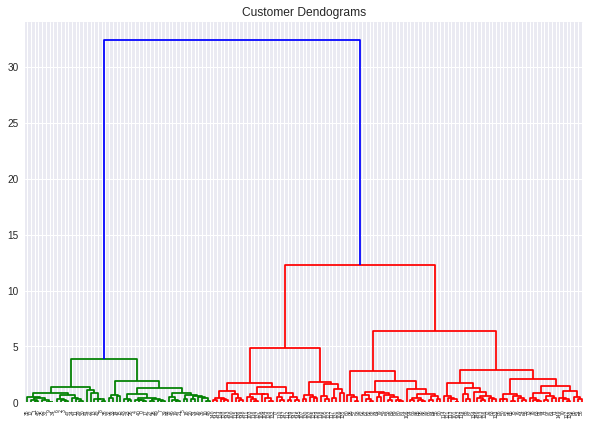

In [54]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward')) 


In [0]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
HC=cluster.fit_predict(X)  

In [56]:
iris['kclassHC'] = np.where(HC==0, 'Iris-setosa', 0)
iris['kclassHC'] = np.where( HC==1, 'Iris-versicolor',iris['kclass2'])
iris['kclassHC'] = np.where( HC==2, 'Iris-virginica',iris['kclass2'])
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class,kclass,kclass2,kclassHC
0,5.1,3.5,1.4,0.2,Iris-setosa,1,Iris-versicolor,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa,1,Iris-versicolor,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-setosa,1,Iris-versicolor,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-setosa,1,Iris-versicolor,Iris-versicolor
4,5.0,3.6,1.4,0.2,Iris-setosa,1,Iris-versicolor,Iris-versicolor


In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(iris.kclassHC,y))

[[ 0 48 14]
 [50  0  0]
 [ 0  2 36]]
